Import Libraries

In [52]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


In [124]:
# save the model as pickle
import pickle

In [69]:
from sklearn.feature_extraction import DictVectorizer

In [54]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet')
# Subtract dropoff time to pickup time  and change to minutes 
df.lpep_dropoff_datetime- df.lpep_pickup_datetime

df['duration'] = df.lpep_dropoff_datetime- df.lpep_pickup_datetime
df.duration = df.duration.apply(lambda td:td.total_seconds()/60)

In [55]:
# df = df[df.trip_type ==2]

/tmp/ipykernel_48584/3426635498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)


<Axes: xlabel='duration', ylabel='Density'>

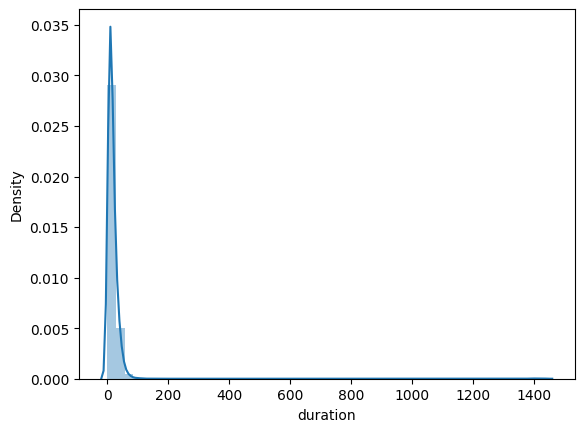

In [56]:
sns.distplot(df.duration)

In [57]:
df.duration.describe(percentiles = [0.95,0.98,0.99])

count    76518.000000
mean        19.927896
std         59.338594
min          0.000000
50%         13.883333
95%         44.000000
98%         56.000000
99%         67.158167
max       1439.600000
Name: duration, dtype: float64

In [62]:
df = df[(df.duration >=1) &  (df.duration <=60)]

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']
df[categorical]= df[categorical].astype('str')

In [75]:
df[categorical + numerical]

,PULocationID,DOLocationID,trip_distance
0,43,151,1.01
1,166,239,2.53
2,41,42,1.12
3,168,75,1.99
7,75,75,0.45
...,...,...,...
76513,81,90,17.63
76514,35,213,18.36
76515,74,69,2.50
76516,168,215,14.48


Change to Dict type by using dict_vectorizer ( One Hot Encoding) Method

In [76]:
train_dicts = df[categorical + numerical].to_dict(orient = 'records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [100]:
dv.feature_names_  # check one hot encoding 

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=109',
 'DOLocationID=11',
 'DOLocationID=111',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=115',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',
 'DOLocationID=145',

In [85]:
target = 'duration' 
y_train = df[target].values

In [120]:
#importing the model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso  # linearregression with regularization
from sklearn.linear_model import Ridge  # linear regression similar to Lasso

# Estimation the score
from sklearn.metrics import mean_squared_error

In [88]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [89]:
y_pred = lr.predict(X_train)

sns.distplot(y_pred, label = 'prediction')
sns.distplot(y_train, label = 'actual')

plt.legend()

Estimation of the score


In [94]:
mean_squared_error(y_train, y_pred, squared = False)  # the result will be root mean square value which is normal minutes 
# THIS IS THE BASE LINE MODEL

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9.838799799829577

In [96]:
#build the dataset containing only PULocation, DOLocation and trip_distance 
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    
    # Subtract dropoff time to pickup time  and change to minutes 
    df['duration'] = df.lpep_dropoff_datetime- df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td:td.total_seconds()/60)

    df = df[(df.duration >=1) &  (df.duration <=60)]
    
    categorical = ['PULocationID', 'DOLocationID']
    numerical = ['trip_distance']
    df[categorical]= df[categorical].astype('str')
    return df 
        

In [98]:
df_train = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet')
df_val = read_dataframe ('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-02.parquet')

In [99]:
len(df_train), len(df_val)

(73908, 61921)

In [104]:
# Preparing for One hot encoding

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']
dv = DictVectorizer()

train_dicts = df_train[categorical+ numerical].to_dict(orient= 'records')
X_train = dv.fit_transform(train_dicts)

val_dicts= df_val[categorical+ numerical].to_dict(orient= 'records')
X_val = dv.transform(val_dicts)

In [110]:
target = 'duration' 
y_train = df_train[target].values
y_val= df_val[target].values

In [128]:
# Building the model
lr = LinearRegression()  # base line result mse = 10.499

# Change to lasso model   
# lr = Lasso(alpha= 0.001)              # get worse mse = 12.2258

# Change to Ridge model   
# lr = Ridge(alpha= 1)              # get worse mse = 12.2258

lr.fit(X_train,y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val,y_pred,squared = False)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


10.499110712717727

In [129]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv,lr), f_out)